In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = "../../data/immo_vis/"
region = "auvergne-rhone-alpes"
prefix= "ventes-"
extension = ".parquet"
input_file = dir + prefix + region + extension
df= pd.read_parquet(input_file)
nb_rows= df.shape[0]
nb_cols= df.shape[1]
print (df.shape)
display(df.head(10))

(527706, 59)


,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,UU2010,REG,DEP,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,entities-1037638-4560933,pr,m,v,0,79,470.0,4,241000,NaN,...,1501,84,1,9.81,3.0,0.039,10.42,9.0,0.041,3050.63
1,immo-facile-57743459,pr,a,v,0,65,650.0,2,136000,NaN,...,1501,84,1,10.65,3.0,0.061,10.50,11.0,0.060,2092.31
2,entities-1037666-4560741,pr,m,v,0,114,450.0,5,260900,NaN,...,1401,84,1,11.34,2.0,0.059,11.34,2.0,0.059,2288.60
3,immo-facile-57762298,pr,m,v,0,148,1500.0,7,286000,NaN,...,1501,84,1,NaN,NaN,NaN,7.27,2.0,0.045,1932.43
4,immo-facile-57762759,pr,m,v,0,213,2251.0,8,435000,NaN,...,1501,84,1,NaN,NaN,NaN,NaN,NaN,NaN,2042.25
5,hektor-369_EXPERTIMO22-195047,pr,m,v,0,120,670.0,4,497000,NaN,...,1000,84,1,17.43,1.0,0.051,17.43,1.0,0.051,4141.67
6,ubiflow-neuf-458508740,pr,m,v,0,143,600.0,5,790000,NaN,...,1000,84,1,15.62,3.0,0.034,15.62,3.0,0.034,5524.48
7,ag440414-458481071,pr,m,v,0,120,670.0,4,485000,NaN,...,1000,84,1,17.43,1.0,0.052,17.43,1.0,0.052,4041.67
8,hektor-369_EXPERTIMO22-191576,pr,a,v,1,72,NaN,3,369000,NaN,...,1000,84,1,16.12,16.0,0.038,16.12,16.0,0.038,5125.00
9,ag340369-457035236,pr,a,v,2,128,NaN,5,440000,NaN,...,1000,84,1,15.43,3.0,0.054,15.43,3.0,0.054,3437.50


In [22]:
#  houses and flats
print (df['typedebien'].value_counts()) 
print (df['typedebien'].value_counts(normalize=True)*100) 

# set charges_copro = 0 for houses
mask = (df['typedebien'] == "m") | (df['typedebien'] == "mn")
df.loc[mask,"charges_copro"] = 0

# set surface_terrain = 0 for flats
mask = (df['typedebien'] == "a") | (df['typedebien'] == "an")
df.loc[mask,'surface_terrain'] = 0


typedebien
a                     262299
m                     246642
an                     13595
mn                      5124
l                         40
Maison/Villa neuve         5
h                          1
Name: count, dtype: int64
typedebien
a                     49.705518
m                     46.738525
an                     2.576245
mn                     0.970995
l                      0.007580
Maison/Villa neuve     0.000947
h                      0.000189
Name: proportion, dtype: float64


In [23]:
#  process typedebien an & mn (neuf ?)
result = df [df['typedebien'] == "an"]
print (f"appartements neufs {result.logement_neuf.value_counts()}")

result = df [df['typedebien'] == "mn"]
print (f"maisons neuves {result.logement_neuf.value_counts()}")

df.loc[df['typedebien'] == "an",'typedebien'] ="a"
df.loc[df['typedebien'] == "mn",'typedebien'] ="m"

print (f"maisons neuves {result.logement_neuf.value_counts()}")
print (f"appartements neufs {result.logement_neuf.value_counts()}")

#  to be processed 
print (df['typedebien'].unique()) 

result = df [df['typedebien'] == "Maison/Villa neuve"]
print (f"maisons neuves {result.logement_neuf.value_counts()}")

appartements neufs logement_neuf
o    13544
n       15
Name: count, dtype: int64
maisons neuves logement_neuf
o    704
Name: count, dtype: int64
maisons neuves logement_neuf
o    704
Name: count, dtype: int64
appartements neufs logement_neuf
o    704
Name: count, dtype: int64
['m' 'a' 'Maison/Villa neuve' 'l' 'h']
maisons neuves Series([], Name: count, dtype: int64)


In [24]:
# Visualisation: Heatmap des valeurs manquantes ( too greedy)
# missing_values = df.isna().sum()
# missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# full_columns = df.columns[ df.isna().any() == False ]
# print (nb_cols)
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )

# plt.figure(figsize=(10, 8))
# sns.heatmap(df[missing_values.index].isna(), 
#             cbar=False,
#             yticklabels=False)
# plt.title("Carte des valeurs manquantes dans le dataset", fontsize=14)
# plt.xlabel("Colonnes")
# plt.ylabel("Observations")
# plt.tight_layout()
# plt.grid(True)
# plt.show()


 nb_rows 527706 nb_cols 59


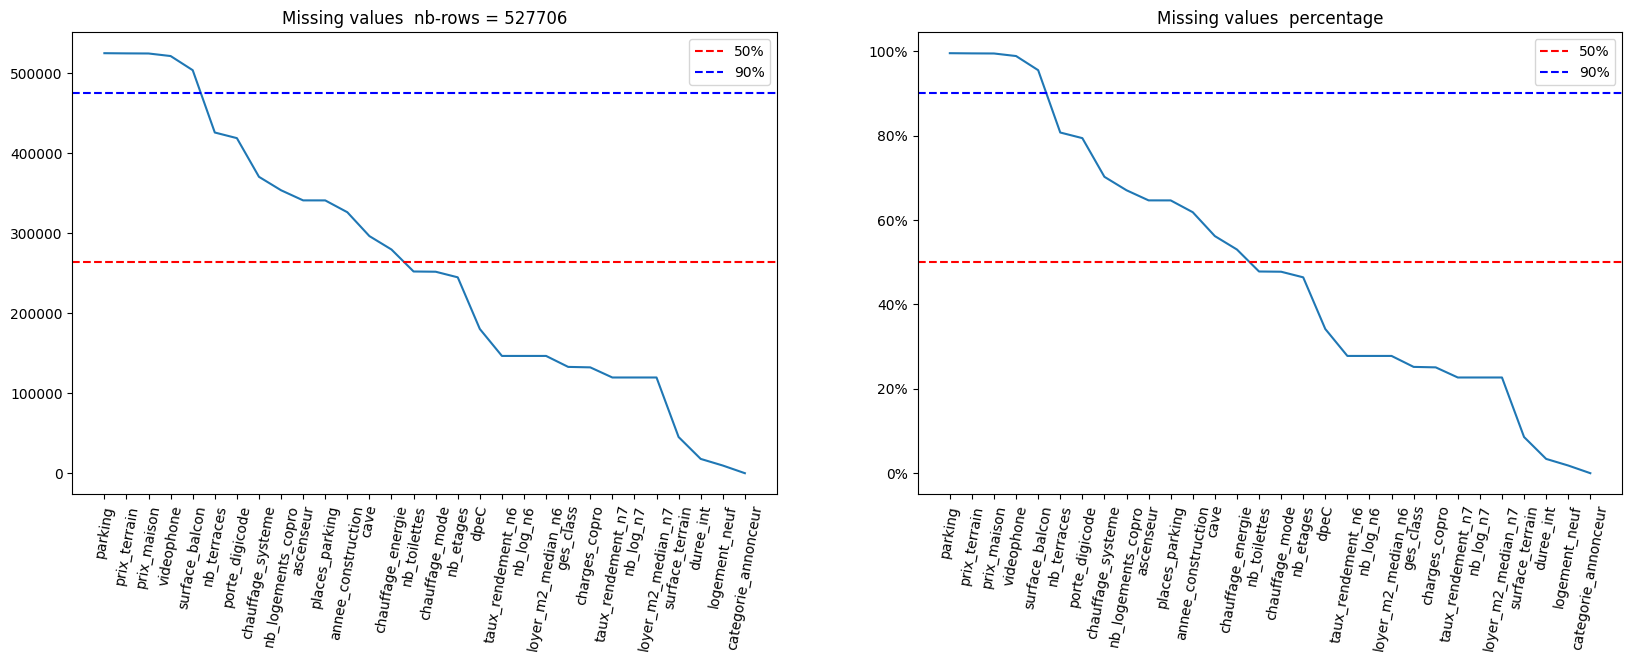

In [25]:
#  stats on Nans, display Nans for all columns
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot (missing_values.index,missing_values.values)
plt.axhline(y=int(nb_rows/2), color='r', linestyle='--', label='50%')
plt.axhline(y=int(nb_rows*0.9), color='b', linestyle='--', label='90%')
plt.legend()

plt.xticks(rotation=80)
plt.title(f"Missing values  nb-rows = {nb_rows}")
ax2 = plt.subplot(122)
missing_values_percent = (missing_values/nb_rows)*100.0
plt.plot (missing_values_percent.index,missing_values_percent.values)
plt.axhline(y=50.0, color='r', linestyle='--', label='50%')
plt.axhline(y=90.0, color='b', linestyle='--', label='90%')
plt.xticks(rotation=80)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
plt.title(f"Missing values  percentage")
plt.legend()
plt.show()

In [26]:
# drop columns with too many nans
print (df.shape)
threshold_start = .9
threshold = int(nb_rows*threshold_start)
empty_cols = []
for name,_ in df.items() :
    if df[name].isna().sum() > threshold :
        empty_cols.append(name) 
print (f"empty cols {empty_cols}")

# remove unnecessary columns
# columns = ["typedebien","typedetransaction","mensualiteFinance","nb_terraces"]
# df = df.drop(columns=columns)

(527706, 59)
empty cols ['prix_maison', 'prix_terrain', 'parking', 'videophone', 'surface_balcon']


In [27]:
# analyse nan values
print(df.isna().sum())

idannonce                       0
type_annonceur                  0
typedebien                      0
typedetransaction               0
etage                           0
surface                         0
surface_terrain             45244
nb_pieces                       0
prix_bien                       0
prix_maison                524866
prix_terrain               524998
mensualiteFinance               0
balcon                          0
eau                             0
bain                            0
dpeL                            0
dpeC                       180346
mapCoordonneesLatitude          0
mapCoordonneesLongitude         0
annonce_exclusive               0
nb_etages                  244950
parking                    525232
places_parking             341143
cave                       296511
exposition                      0
ges_class                  132940
annee_construction         326365
nb_toilettes               252245
nb_terraces                426042
videophone    

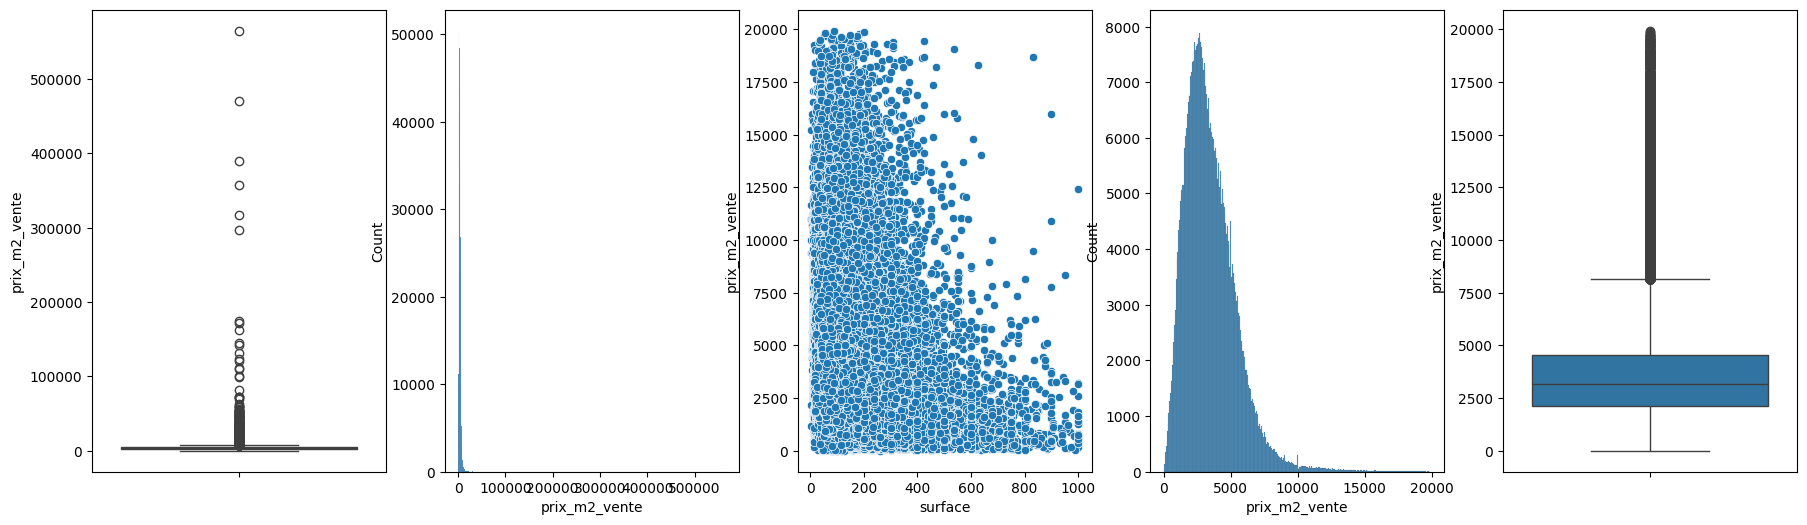

In [28]:
#  analyze prix de vente , chop at 20000 
plt.figure(figsize=(22,6))
plt.subplot(151)
sns.boxplot(df['prix_m2_vente'])
plt.subplot(152)
sns.histplot(df['prix_m2_vente'])
plt.subplot(153)
df = df [df['prix_m2_vente'] <20000].reset_index(drop=True)

sns.scatterplot (df,x="surface",y="prix_m2_vente")
plt.subplot(154)
sns.histplot(df['prix_m2_vente'])
plt.subplot(155)
sns.boxplot(df['prix_m2_vente'])
plt.show()


In [29]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

idannonce: ['entities-1037638-4560933' 'immo-facile-57743459'
 'entities-1037666-4560741' ... '142451863' '113594831' '113594825']
type_annonceur: ['pr']
typedebien: ['m' 'a' 'Maison/Villa neuve' 'l' 'h']
typedetransaction: ['v' 'vp' 'pi']
dpeL: ['0' 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B' 'Blank' '0 kWh/m².year'
 'D - 231 kWh/m².year' 'D-218 kWh/m².year']
annonce_exclusive: ['0' 'Oui' 'Non']
parking: [None True False]
cave: [None False True]
exposition: ['0' 'Sud-Ouest' 'Sud' 'Sud-Est' 'Sud/Est' 'Est' 'SO' 'Ouest' 'E, S'
 'Est-Ouest' 'Nord-Ouest' 'Nord-Sud' 'sud-ouest' 'sud-est'
 'Traversant-Est-Ouest' 'traversant' 'Nord' 'traversant nord-sud'
 'nord-est / sud-ouest' 'Sud-Est-Ouest' 'Nord-Est' 'OUEST' 'NE'
 'Sud/Ouest' 'NS' 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord/Ouest'
 'Nord Sud Est Ouest' 'SUD EST' 'Nord-ouest' 'nord-ouest / sud-est'
 'EST SUD OUEST' 'Nord Sud Ouest' 'N' 'NO' 'Nord-est' 'Nord Est Ouest'
 'Est - Ouest' 'sud,est' 'sud est' 'Sud-Sud/Est' 'sud,ouest' 'EST'
 'Sud Ouest  No

132696
ges_class
Unknown    132702
B           77453
C           75956
D           63286
A           49176
E           44495
F/G         31919
F           19655
G           12944
0               3
Name: count, dtype: int64


<Axes: xlabel='ges_class', ylabel='Count'>

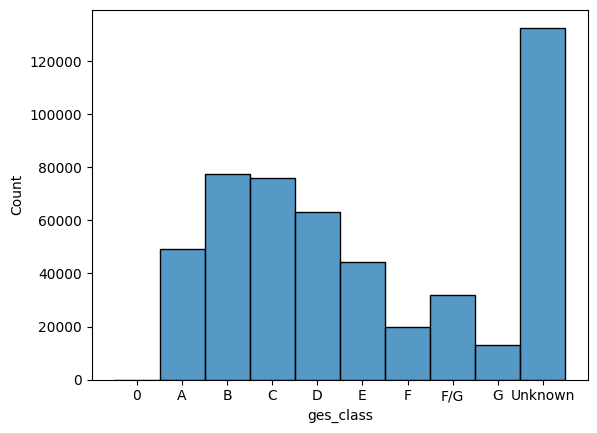

In [30]:
# process categorial ges_class : gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("Unknown")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0 kg CO2/m².year"],value=["D","E","Unknown","0"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


['0' 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B' 'Blank' '0 kWh/m².year'
 'D - 231 kWh/m².year' 'D-218 kWh/m².year']
0
dpeL
D                      115616
0                       85849
E                       78533
C                       72414
NS                      47382
VI                      32777
F                       29066
B                       26636
A                       20551
G                       18399
Blank                       7
0 kWh/m².year               2
D - 231 kWh/m².year         1
D-218 kWh/m².year           1
Name: count, dtype: int64
dpeL
D          115618
0           85851
E           78533
C           72414
F/G         32777
F           29066
B           26636
A           20551
G           18399
Unknown         7
Name: count, dtype: int64


<Axes: xlabel='dpeL', ylabel='Count'>

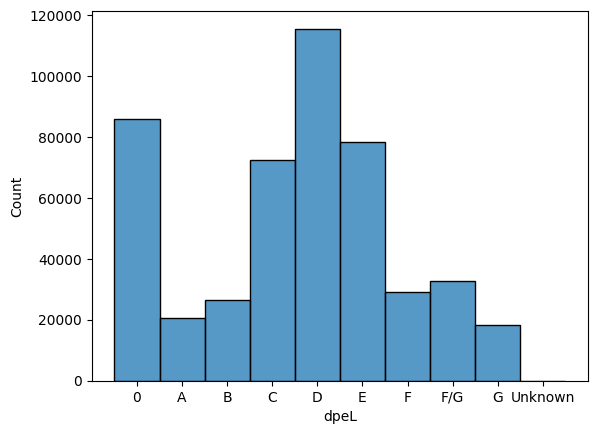

In [31]:
#  process categorial dpeL
#  NS means non significative
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())
df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank",'0 kWh/m².year'],value=["D","D","Unknown","0"])
df["dpeL"] = df["dpeL"].replace(to_replace=["VI"],value=["F/G"])
df['dpeL'] = pd.Categorical(df['dpeL'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print(df["dpeL"].value_counts())

sns.histplot(df["dpeL"])


19645
ges_class
Unknown    152347
B           77453
C           75956
D           63286
A           49176
E           44495
F/G         31919
F           19655
G           12944
0               3
Name: count, dtype: int64


<Axes: xlabel='ges_class', ylabel='Count'>

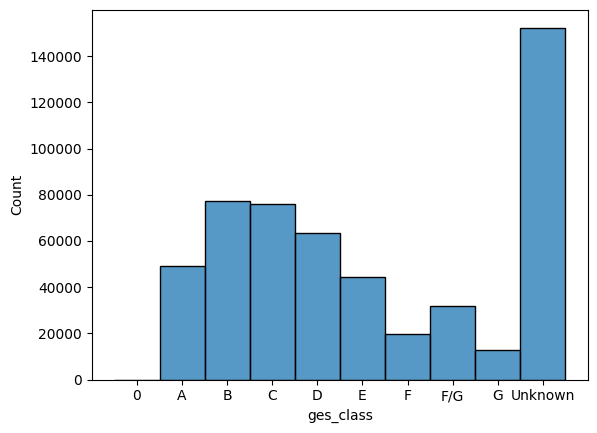

In [32]:
# process categorial ges_class gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("Unknown")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank"],value=["D","E","Unknown"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])
print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


[None 'Individuel' 'Collectif' 'Individuel, Central' 'Central'
 'Collectif, Central' 'Collectif, Individuel'
 'Collectif, Individuel, Central']
251596
chauffage_mode
unknown                           251596
Individuel                        220686
Collectif                          49513
Collectif, Central                  1517
Individuel, Central                 1465
Central                             1372
Collectif, Individuel               1084
Collectif, Individuel, Central         1
Name: count, dtype: int64
chauffage_mode
unknown       251596
Individuel    223236
Collectif      52402
Name: count, dtype: int64


<Axes: xlabel='chauffage_mode', ylabel='Count'>

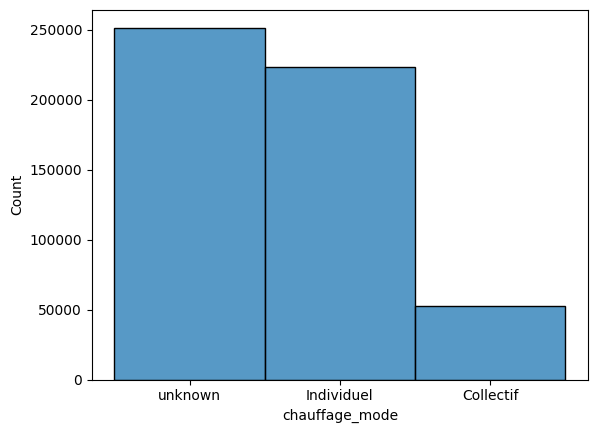

In [33]:
#porcess categorial  chauffage mode, 50% isna
print(df["chauffage_mode"].unique())
print(df["chauffage_mode"].isna().sum())
df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
print(df["chauffage_mode"].value_counts())
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
print(df["chauffage_mode"].value_counts())

sns.histplot(df["chauffage_mode"])


[None 'Fioul' 'Gaz' 'Électrique' 'Électrique, Bois' 'Bois' 'Gaz, Bois'
 'Bois, Fioul' 'Fioul, Bois' 'Fioul, Électrique' 'Gaz, Électrique'
 'Bois, Électrique' 'Électrique, Fioul' 'Électrique, Bois, Fioul'
 'Gaz, Électrique, Bois' 'Gaz, Bois, Électrique' 'Gaz, Fioul'
 'Gaz, Bois, Fioul' 'Bois, Fioul, Électrique' 'Électrique, Fioul, Bois']
279374
chauffage_energie
unknown                    279374
Gaz                        119138
Électrique                  93509
Fioul                       28177
Bois                         3441
Électrique, Bois             2319
Gaz, Bois                     425
Bois, Fioul                   383
Fioul, Bois                   197
Gaz, Électrique               146
Fioul, Électrique              43
Bois, Électrique               42
Électrique, Fioul              14
Électrique, Bois, Fioul        12
Gaz, Fioul                      5
Gaz, Électrique, Bois           4
Gaz, Bois, Électrique           2
Gaz, Bois, Fioul                1
Bois, Fioul, Électrique 

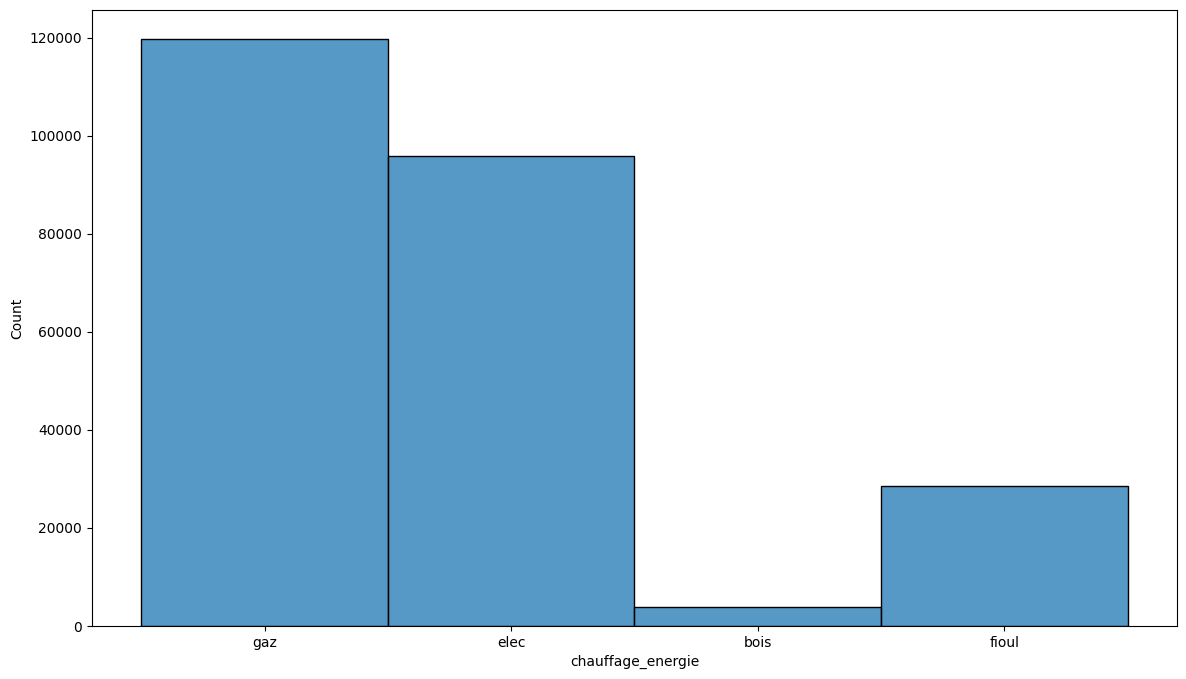

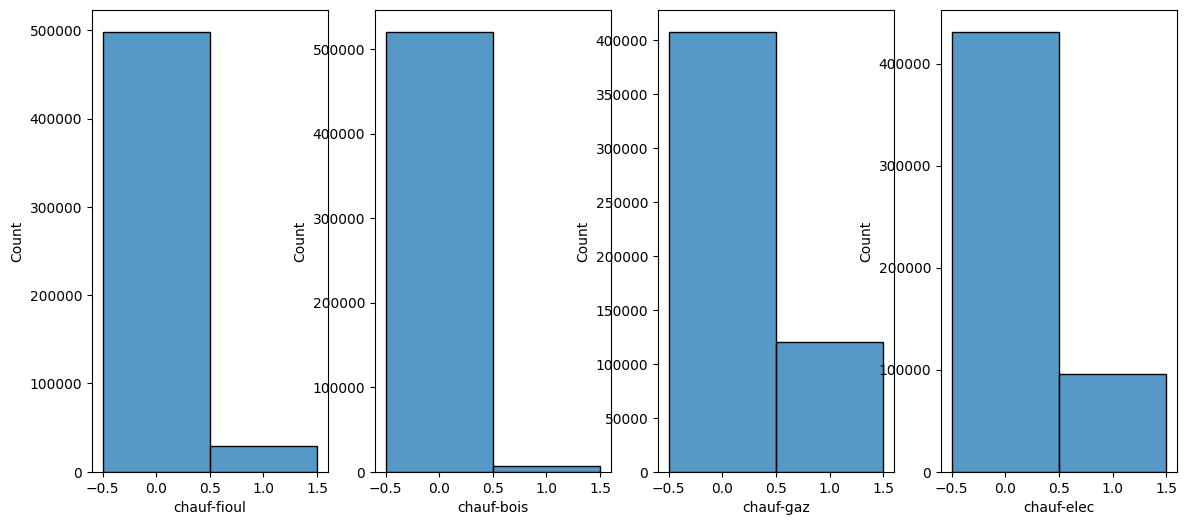

In [34]:
#process categorial chauffage energie
print(df["chauffage_energie"].unique())
print(df["chauffage_energie"].isna().sum())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")
print(df["chauffage_energie"].value_counts())
df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)


df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["gaz","elec","bois","fioul"]
for energy in energies :
    target = "chauf-" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

for energy in energies :
#  simplify chauffage-energie to first value
    df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : energy if x.startswith(energy) else x)
df['chauffage_energie'] = pd.Categorical(df['chauffage_energie'], energies)


plt.figure(figsize=(14,8))
sns.histplot(df["chauffage_energie"])

plt.figure(figsize=(14,6))
plt.subplot(141)
sns.histplot(df["chauf-fioul"],discrete=True)
plt.subplot(142)
sns.histplot(df["chauf-bois"],discrete=True)
plt.subplot(143)
sns.histplot(df["chauf-gaz"],discrete=True)
plt.subplot(144)
sns.histplot(df["chauf-elec"],discrete=True)
plt.show()


[None 'Radiateur' 'Sol' 'Pompe à chaleur' 'Poêle à Bois' 'Cheminée'
 'Pompe à chaleur, Sol' 'Climatisation révérsible'
 'Radiateur, Poêle à Bois' 'Sol, Poêle à Bois' 'Chaudière'
 'Pompe à chaleur, Radiateur' 'Pompe à chaleur, Poêle à Bois' 'Convecteur'
 'Pompe à chaleur, Climatisation révérsible' 'Sol, Radiateur'
 'Pompe à chaleur, Sol, Radiateur' 'Pompe à chaleur, Convecteur'
 'Convecteur, Poêle à Bois' 'Cheminée, Chaudière'
 'Pompe à chaleur, Cheminée' 'Cheminée, Poêle à Bois'
 'Radiateur, Cheminée' 'Sol, Cheminée'
 'Convecteur, Cheminée, Poêle à Bois' 'Radiateur, Chaudière'
 'Climatisation révérsible, Poêle à Bois' 'Sol, Chaudière'
 'Sol, Radiateur, Poêle à Bois' 'Sol, Convecteur' 'Convecteur, Cheminée'
 'Cheminée, Climatisation révérsible'
 'Radiateur, Climatisation révérsible'
 'Pompe à chaleur, Sol, Poêle à Bois'
 'Convecteur, Climatisation révérsible' 'Sol, Climatisation révérsible'
 'Radiateur, Chaudière, Climatisation révérsible'
 'Convecteur, Chaudière, Climatisation révérsib

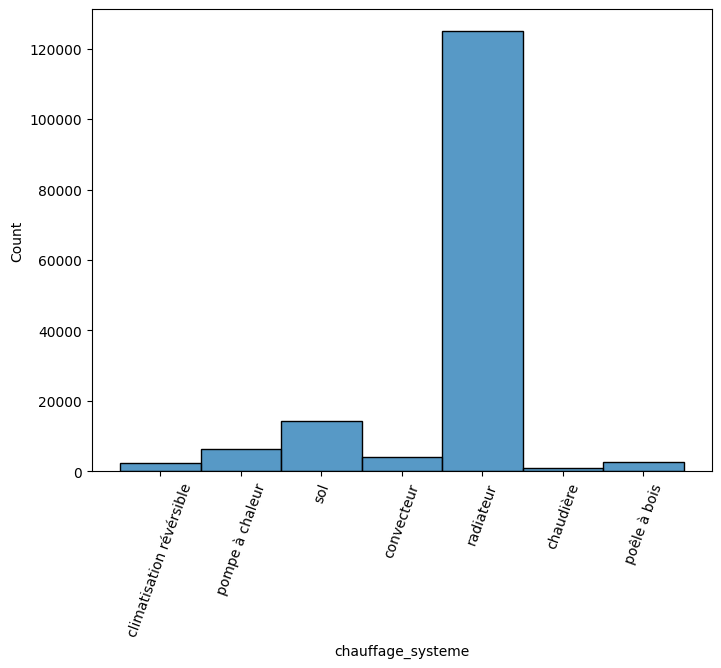

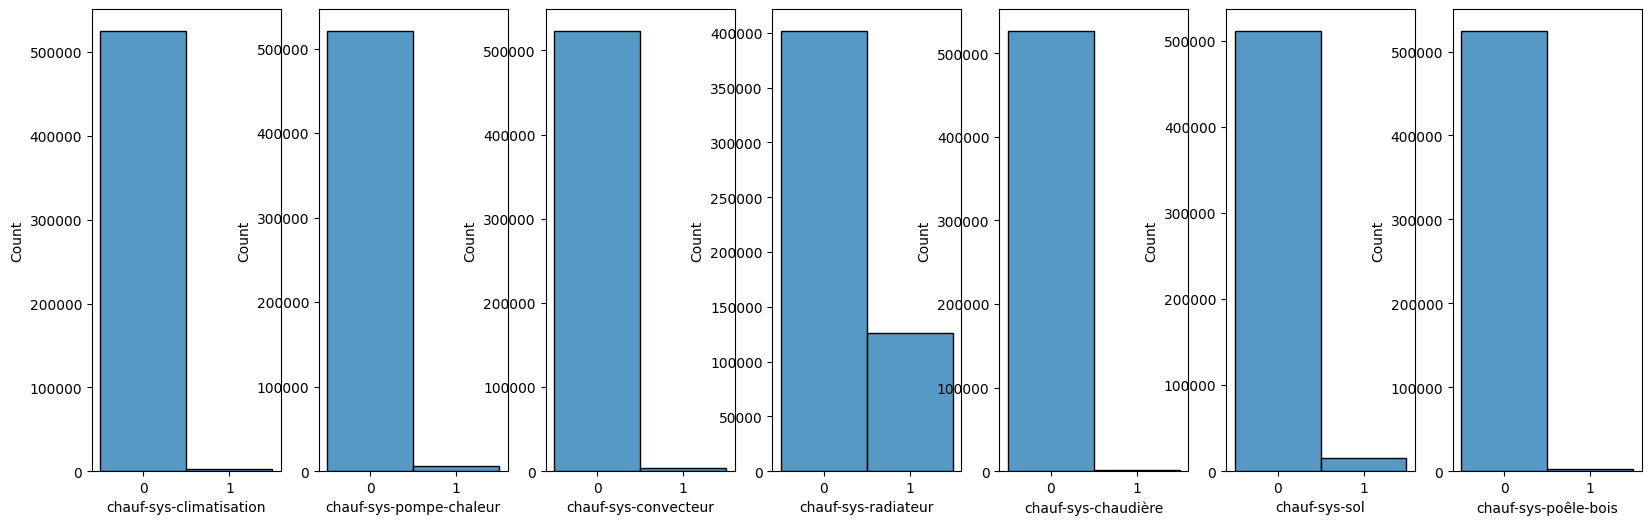

In [35]:
# process categorial  systeme de chaufage

print(df["chauffage_systeme"].unique())
print(df["chauffage_systeme"].isna().sum())
df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")

df['chauffage_systeme'] = df['chauffage_systeme'].str.lower()
df['chauffage_systeme'] = df['chauffage_systeme'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)

name = "fluide caloporteur"
df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : "pompe à chaleur" if name in x else x)

#  create sub-categories
energies = ["climatisation","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle à bois"]
outers = ["climatisation","pompe-chaleur","convecteur","radiateur","chaudière","sol","poêle-bois"]
for energy,outer in zip(energies,outers) :
    target = "chauf-sys-" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())
# sort by decreasing importance
energies = ["climatisation révérsible","pompe à chaleur","sol","convecteur","radiateur","chaudière","poêle à bois"]
for name in energies : 
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)
df['chauffage_systeme'] = pd.Categorical(df['chauffage_systeme'], energies)

plt.figure(figsize=(8,6))
sns.histplot(df["chauffage_systeme"])
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(20,6))

plt.subplot(171)
sns.histplot(df["chauf-sys-climatisation"],discrete=True)
plt.subplot(172)
sns.histplot(df["chauf-sys-pompe-chaleur"],discrete=True)
plt.subplot(173)
sns.histplot(df["chauf-sys-convecteur"],discrete=True)
plt.subplot(174)
sns.histplot(df["chauf-sys-radiateur"],discrete=True)
plt.subplot(175)
sns.histplot(df["chauf-sys-chaudière"],discrete=True)
plt.subplot(176)
sns.histplot(df["chauf-sys-sol"],discrete=True)
plt.subplot(177)
sns.histplot(df["chauf-sys-poêle-bois"],discrete=True)

plt.show()



['0' 'Sud-Ouest' 'Sud' 'Sud-Est' 'Sud/Est' 'Est' 'SO' 'Ouest' 'E, S'
 'Est-Ouest' 'Nord-Ouest' 'Nord-Sud' 'sud-ouest' 'sud-est'
 'Traversant-Est-Ouest' 'traversant' 'Nord' 'traversant nord-sud'
 'nord-est / sud-ouest' 'Sud-Est-Ouest' 'Nord-Est' 'OUEST' 'NE'
 'Sud/Ouest' 'NS' 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord/Ouest'
 'Nord Sud Est Ouest' 'SUD EST' 'Nord-ouest' 'nord-ouest / sud-est'
 'EST SUD OUEST' 'Nord Sud Ouest' 'N' 'NO' 'Nord-est' 'Nord Est Ouest'
 'Est - Ouest' 'sud,est' 'sud est' 'Sud-Sud/Est' 'sud,ouest' 'EST'
 'Sud Ouest  Nord Ouest' 'nord,est' 'nord,ouest' 'SUD Ouest' 'Sur Est'
 'nord,sud' 'Sud et Est' 'Nord, Sud' 'S/E' 'est / ouest' 'SUD-EST-OUEST'
 'est,ouest' 'Est, Ouest' 'ON' 'SE/SO' 'Sud/ouest' 'Nord-Sud-Est-Ouest'
 'EST / OUEST' 'Nord, Est, Ouest, Sud' 'Est Sud' 'Suid Ouest' 'Ouest Sud'
 'OUEST / SUD' 'sud ouest' 'OUET' 'Sud / Nord sur cour' 'N/S' 'EST OUEST'
 'NORD SUD' 'Ouest - Sud - Est' 'Nord, Ouest' 'est ouest' 'Sud et Ouest'
 'NORD OUEST' 'EST-OUEST' 'Sud Oues

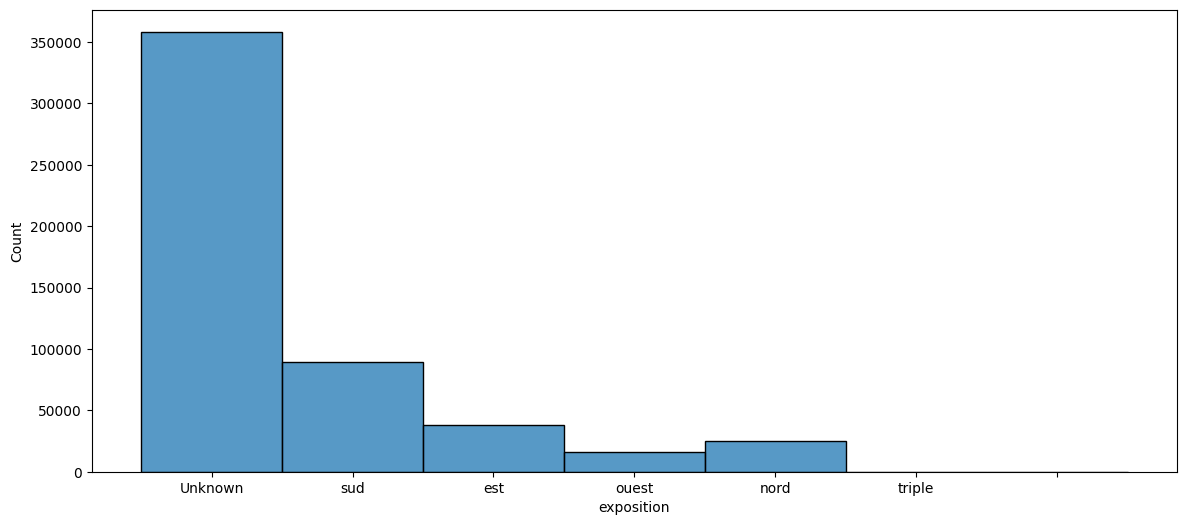

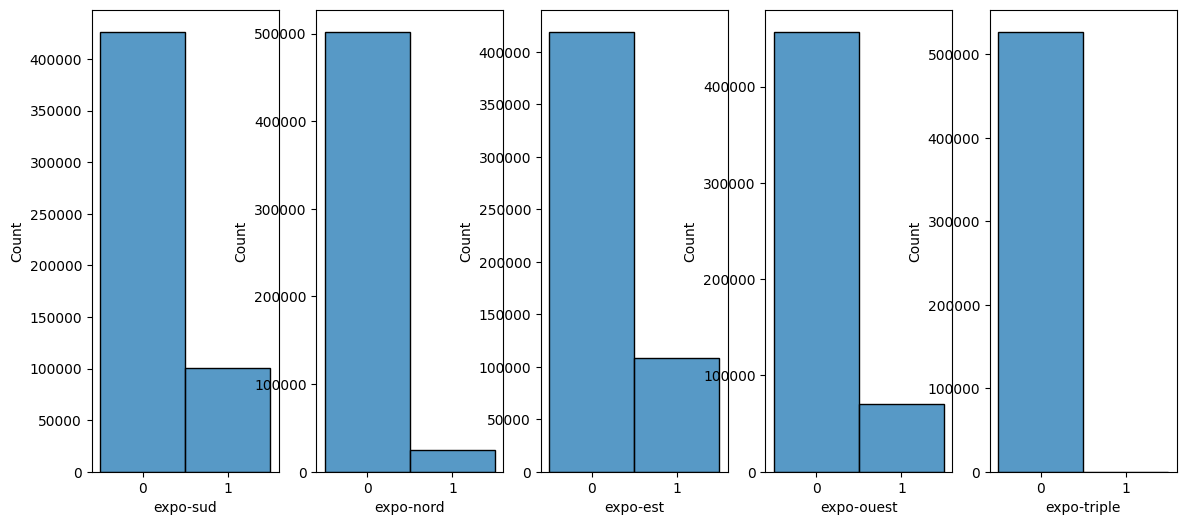

In [36]:
# refactor expositio
print (df.exposition.unique())
df['exposition'] = df['exposition'].str.lower()
print(df["exposition"].unique())
df['exposition'] = df['exposition'].replace(to_replace=[" / ","/"," - "," -"," et ",", "," ,",","],value=["-","-","-","-","-","-","-","-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["ne","so","n","ns","n-s","n-e-o"],value=["nord-est","sud-ouest","nord","nord-sud","nord-sud","nord-est-ouest"])

df['exposition'] = df['exposition'].replace(to_replace=["no","e-n-e","est-ouest-"],value=["nord-ouest","est-nord-est","est-ouest"])
df['exposition'] = df['exposition'].replace(to_replace=["nord-sud-(balcon)","sud-ouest-&-est","traversant-"],value=["","sud-ouest-est",""])
df['exposition'] = df['exposition'].replace(to_replace=["plein ","oest","sur","traversant","suid"],value=["","ouest","sud","","sud"],regex=True)
# df['exposition'] = df['exposition'].replace(to_replace=[" "],value=["-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["-est-ouest","-sud-nord","-nord-sud"," nord-sud"," sud-nord"],value=["est-ouest","sud-nord","nord-sud","nord-sud","sud-nord"])
df['exposition'] = df['exposition'].replace(to_replace=[""],value=["Unknown"])
df['exposition'] = df['exposition'].replace(to_replace=["3 expositions","triple exposition","toutes expositions"],value=["triple","triple","triple"])
df['exposition'] = df['exposition'].replace(to_replace=["e-s","s-e","ouet","se-so"],value=["est-sud","sud-est","ouest","sud-est-sud-ouest"])
df['exposition'] = df['exposition'].replace(to_replace=["110",'on','os','n-e','s-n','ne-no' ],value=["nord-ouest","est-ouest","ouest-sud","nord-est","sud-nord","nord-est-nord-ouest"])
df['exposition'] = df['exposition'].replace(to_replace=["bonne",'très bonne'],value=["",""])
df["expo-triple"] = df["exposition"].apply(lambda x : 1 if ("triple" in x or "3" in x) else 0)

# df = df [df['exposition'] != "triple"].reset_index(drop=True)
# df = df [df['exposition'] != "3 expositions"].reset_index(drop=True)
# df = df [df['exposition'] != ""].reset_index(drop=True)


print(f" after processing {df['exposition'].unique()}")

# create expo-sud, expo-nord, expo-est,expo-ouest
cardinals = ["nord","sud","est","ouest"]
for cardinal in cardinals :
    target = "expo-" + cardinal
    print(target)
    df[target] = df["exposition"].apply(lambda x : 1 if cardinal in x else 0)
    print (df[target].value_counts())

# simplify exposition to est,ouest,sud,nord
df["exposition"] = df["exposition"].replace(to_replace=["0"],value=["Unknown"])
df["exposition"] = df["exposition"].apply(lambda x : "nord" if x.startswith('nord') else x)
df["exposition"] = df["exposition"].apply(lambda x : "sud" if x.startswith('sud') else x)
df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('est') else x)
# df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('-est') else x)
df["exposition"] = df["exposition"].apply(lambda x : "ouest" if x.startswith('ouest') else x)


print(df["exposition"].unique())
plt.figure(figsize=(14,6))
sns.histplot(df["exposition"])
plt.show()
plt.figure(figsize=(14,6))
plt.subplot(151)
sns.histplot(df["expo-sud"],discrete=True)
plt.subplot(152)
sns.histplot(df["expo-nord"],discrete=True)
plt.subplot(153)
sns.histplot(df["expo-est"],discrete=True)
plt.subplot(154)
sns.histplot(df["expo-ouest"],discrete=True)
plt.subplot(155)
sns.histplot(df["expo-triple"],discrete=True)
plt.show()


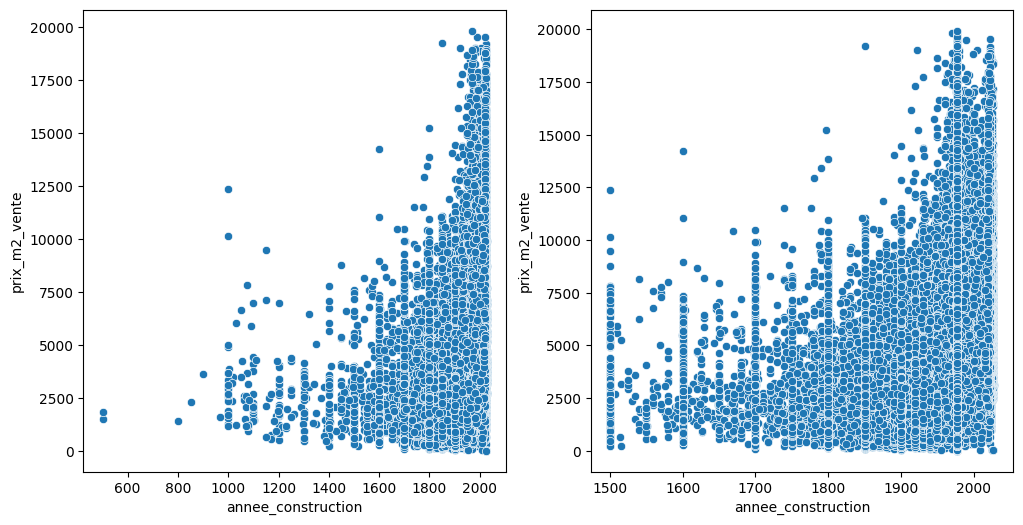

In [37]:
# process annee_construction

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(y=df["prix_m2_vente"],x=df['annee_construction'])

df['annee_construction'] = df['annee_construction'].apply(lambda x : 1500  if x < 1500 else x)
df["annee_construction"].unique()
df["annee_construction"] = df["annee_construction"].fillna(df["annee_construction"].median())
df["annee_construction"] = df["annee_construction"].astype("int")

plt.subplot(122)
sns.scatterplot(y=df["prix_m2_vente"],x=df['annee_construction'])
plt.show()

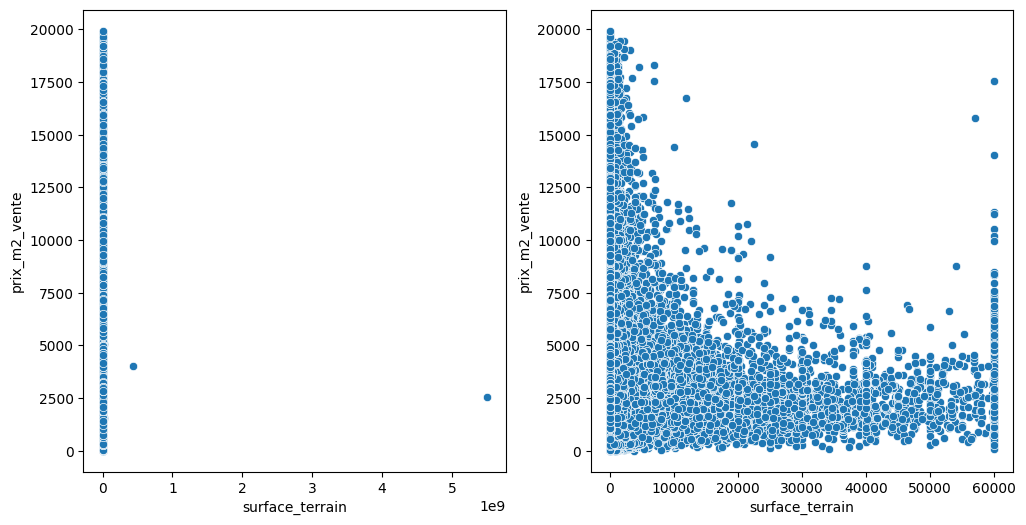

In [38]:
#  process surface_terrain
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(y=df["prix_m2_vente"],x=df['surface_terrain'])

df['surface_terrain'] = df['surface_terrain'].apply(lambda x : 60000  if x > 60000 else x)
df["surface_terrain"].unique()
df["surface_terrain"] = df["surface_terrain"].fillna(df["surface_terrain"].median())

plt.subplot(122)
sns.scatterplot(y=df["prix_m2_vente"],x=df['surface_terrain'])
plt.show()


<class 'pandas.core.indexes.base.Index'>


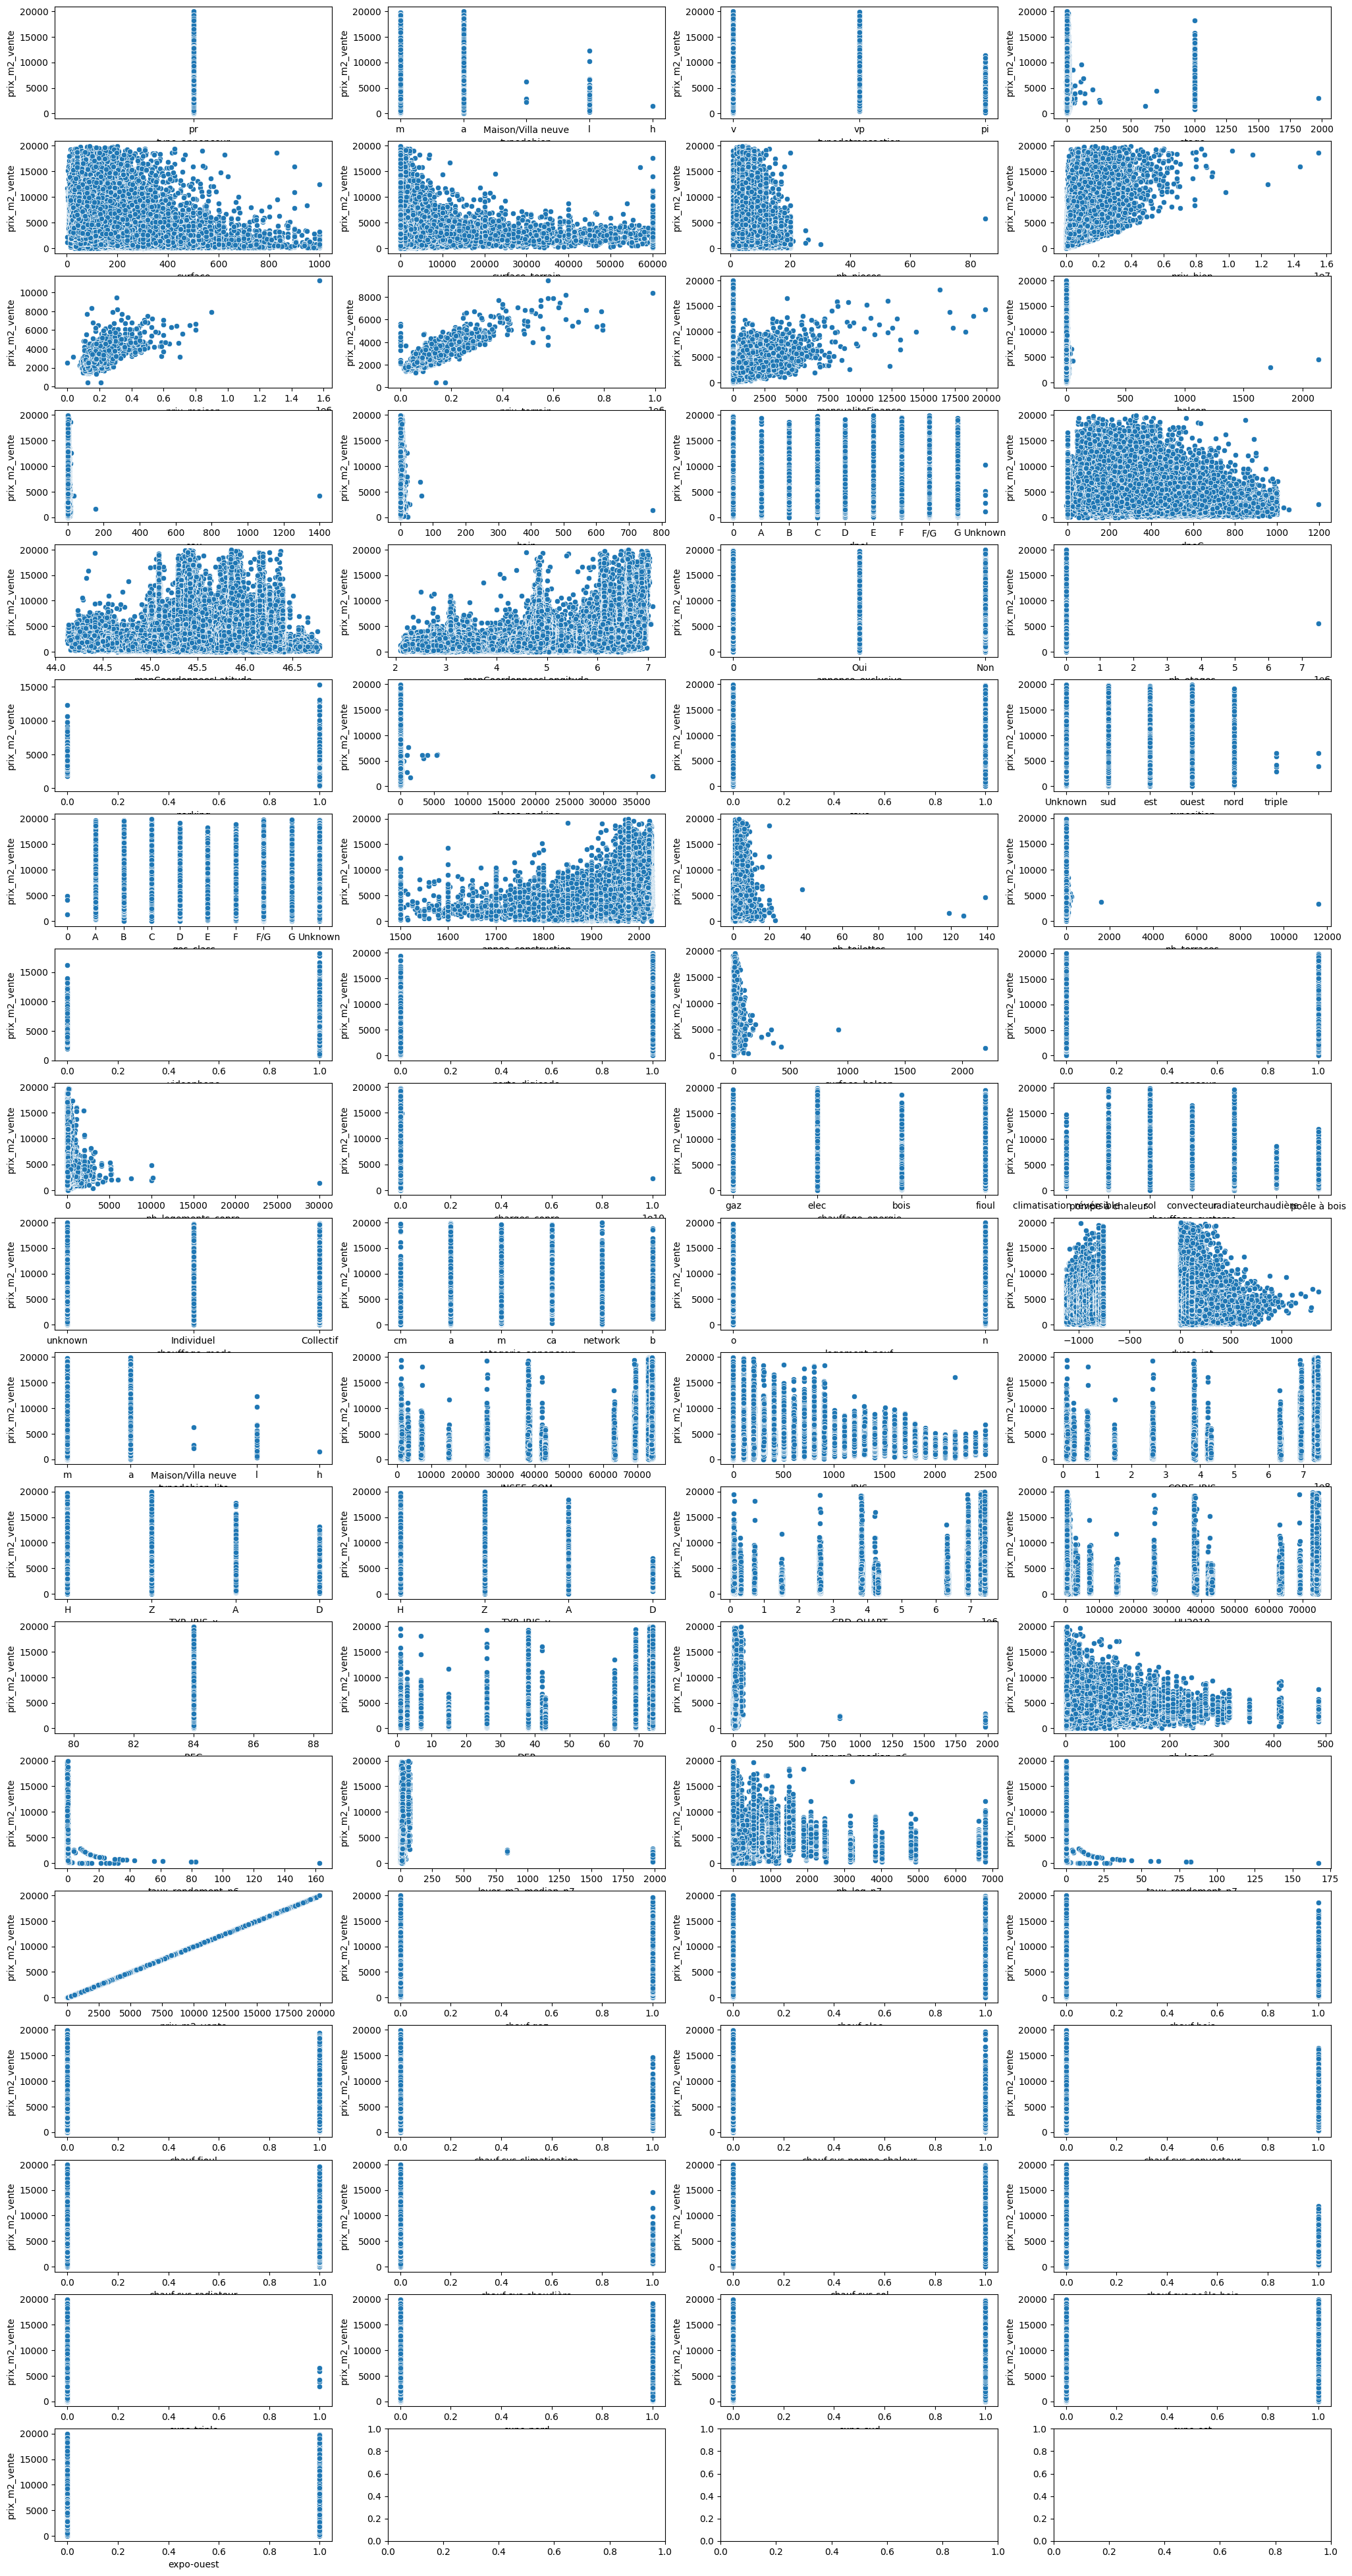

In [39]:
#  scatter plot of each column / prix_m2_vente
df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [40]:
import numpy as np
#  process nans for numercial columns

#   nb_toilettes set Nan to 1
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
print (df["nb_toilettes"].isna().sum())
df['nb_toilettes'] = df['nb_toilettes'].apply(lambda x : 10  if x > 10 else x)

#   dpec set Nan to 0
df["dpeC"] = df["dpeC"].fillna(0)
print (df["dpeC"].isna().sum())

# nb_etages set Nan to mean value
df["nb_etages"] = df["nb_etages"].fillna(df["nb_etages"].median()).astype(int)

# porte digicode set Nan to False
print (df['porte_digicode'].isna().sum())
df["porte_digicode"] = df["porte_digicode"].fillna(False)

# loyer fillna to zero
attributes = ["loyer_m2_median_n6","nb_log_n6","taux_rendement_n6"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)
    
attributes = ["loyer_m2_median_n7","nb_log_n7","taux_rendement_n7"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)


# nb_terrace remove surious value
df['nb_terraces'] = df['nb_terraces'].apply(lambda x : df['nb_terraces'].median()  if x >200  else x)
df["nb_terraces"] = df["nb_terraces"].fillna(0)

# cave fillna 0
df["cave"] = df["cave"].fillna(0)

# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna('u')

# ascenceur
print (df["duree_int"].unique())
df["duree_int"] = df["duree_int"].fillna(0)


0
0
418604


/tmp/ipykernel_5501/2953065519.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["porte_digicode"] = df["porte_digicode"].fillna(False)


[ 8.000e+00        nan  1.400e+01  7.000e+00  2.000e+01  2.200e+01
  1.500e+01  3.500e+01  4.200e+01  2.900e+01  3.600e+01  2.800e+01
  5.000e+01  2.100e+01  4.300e+01  6.400e+01  6.300e+01  4.900e+01
  5.600e+01  5.700e+01  7.000e+01  6.000e+00  2.700e+01  3.400e+01
  1.900e+01  1.200e+01  7.600e+01  6.900e+01  5.800e+01  2.600e+01
  8.400e+01  5.500e+01  2.300e+01  7.700e+01  4.100e+01  7.800e+01
  4.800e+01  7.100e+01  6.200e+01  7.200e+01  9.800e+01  9.100e+01
  1.700e+01  1.600e+01  9.000e+00  1.140e+02  3.000e+01  8.500e+01
  3.100e+01  9.200e+01  1.130e+02  2.400e+01  9.900e+01  4.400e+01
  3.700e+01  1.200e+02  6.500e+01  1.270e+02  1.070e+02  9.300e+01
  5.200e+01  4.500e+01  4.000e+01  1.300e+01  3.300e+01  1.330e+02
  1.120e+02  5.000e+00  8.600e+01  1.480e+02  5.100e+01  1.260e+02
  1.280e+02  8.300e+01  1.420e+02  1.190e+02  1.540e+02  1.060e+02
  1.340e+02  1.350e+02  7.300e+01  7.900e+01  1.010e+02  1.910e+02
  9.400e+01  9.700e+01  5.400e+01  1.840e+02  1.770e+02  1.620

In [41]:
print (df.isna().sum())


idannonce            0
type_annonceur       0
typedebien           0
typedetransaction    0
etage                0
                    ..
expo-triple          0
expo-nord            0
expo-sud             0
expo-est             0
expo-ouest           0
Length: 75, dtype: int64


copro isna 132082
copro isna charges_copro
0.00       254914
1200.00      3999
1800.00      2145
600.00       2070
2400.00      1946
            ...  
1705.56         1
774.92          1
1093.48         1
1579.70         1
652.81          1
Name: count, Length: 18924, dtype: int64
 0.0 10000000000.0 


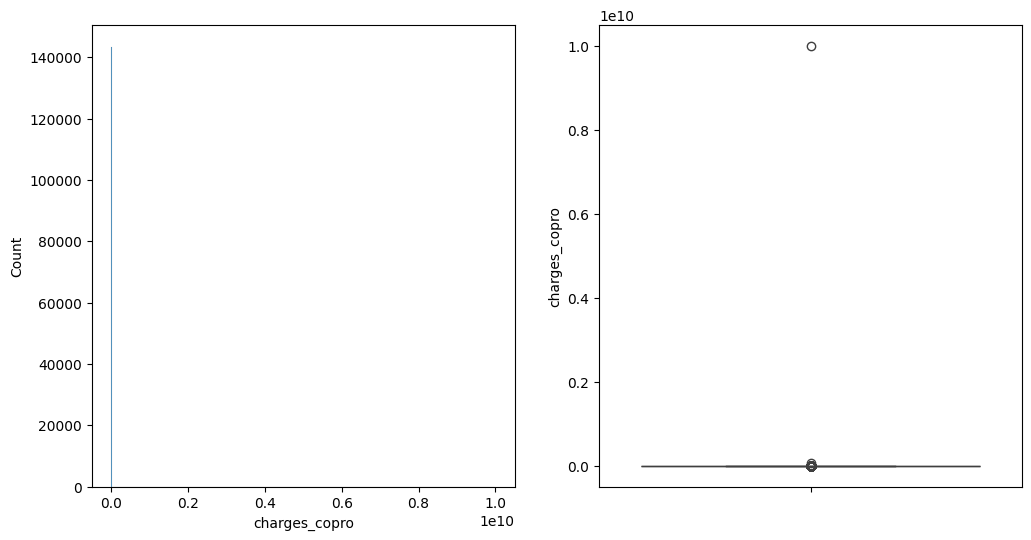

/tmp/ipykernel_5501/3254428041.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['charges_copro_cat']=pd.cut(x = dfa['charges_copro'],bins=bins,labels=labels,include_lowest = True)


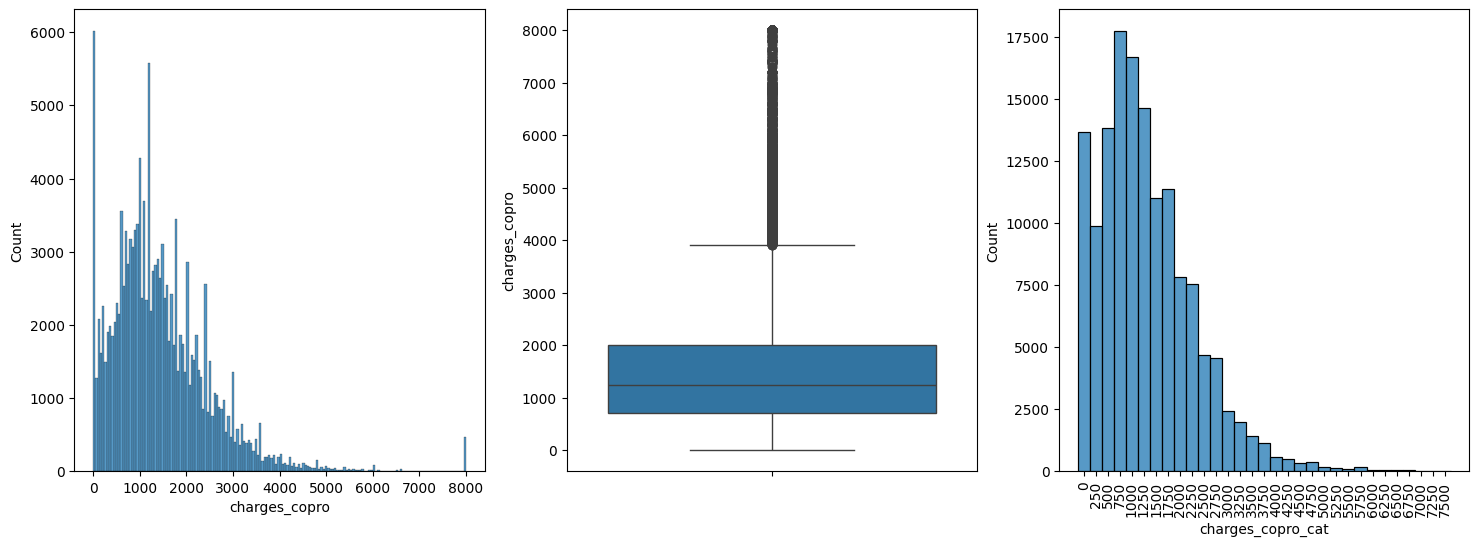

/tmp/ipykernel_5501/3254428041.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['charges_copro_per_m2']= dfa['charges_copro']/dfa['surface']


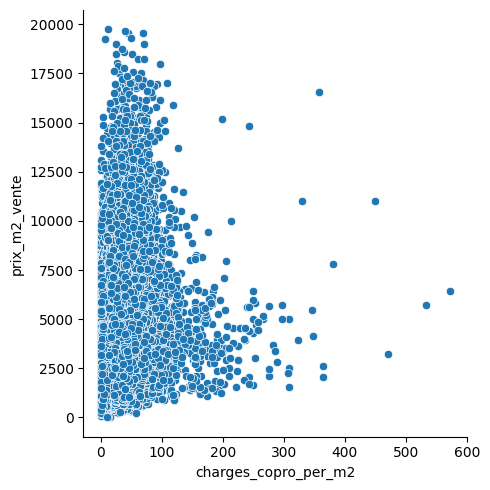

In [42]:

# charges copro for appartement
# charges copro / remove spurious value
# df = df.reindex(sorted(df.columns), axis=1)

import numpy as np

print (f"copro isna {df.charges_copro.isna().sum()}")
print (f"copro isna {df.charges_copro.value_counts()}")

dfa = df [df["typedebien"] == "a"]

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(dfa["charges_copro"])
plt.subplot(122)
sns.boxplot(dfa["charges_copro"])
# print (df["charges_copro"].unique())
print (f" {dfa['charges_copro'].min()} {dfa['charges_copro'].max()} ")

# filna with median values
# df['charges_copro'] = df['charges_copro'].fillna(0)

plt.show()
max_value = 8000
plt.figure(figsize=(18,6))
dfa.loc[lambda x : dfa ["charges_copro"] > max_value,"charges_copro"] = max_value
plt.subplot(131)
sns.histplot(dfa["charges_copro"])
plt.subplot(132)
sns.boxplot(dfa["charges_copro"])
#  build charge_copro_cat
bins = np.arange(0,max_value,250).tolist()
labels = [str(x) for x in bins]
labels.pop()
dfa['charges_copro_cat']=pd.cut(x = dfa['charges_copro'],bins=bins,labels=labels,include_lowest = True)
plt.subplot(133)
sns.histplot(dfa["charges_copro_cat"],bins=250)
plt.xticks(rotation=90)
plt.show()
#  build charge_copro_per_m2
dfa['charges_copro_per_m2']= dfa['charges_copro']/dfa['surface']

sns.relplot(dfa,x="charges_copro_per_m2",y="prix_m2_vente")
plt.show()

In [43]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

idannonce: ['entities-1037638-4560933' 'immo-facile-57743459'
 'entities-1037666-4560741' ... '142451863' '113594831' '113594825']
type_annonceur: ['pr']
typedebien: ['m' 'a' 'Maison/Villa neuve' 'l' 'h']
typedetransaction: ['v' 'vp' 'pi']
annonce_exclusive: ['0' 'Oui' 'Non']
parking: [None True False]
cave: [0 True]
exposition: ['Unknown' 'sud' 'est' 'ouest' 'nord' 'triple' '']
videophone: [None True False]
ascenseur: [None False True]
chauffage_mode: ['unknown' 'Individuel' 'Collectif']
categorie_annonceur: ['cm' 'a' 'm' 'ca' 'network' 'b' None]
logement_neuf: ['o' 'n' 'u']
typedebien_lite: ['m' 'a' 'Maison/Villa neuve' 'l' 'h']
date: ['2025-02' '2025-01' '2024-12' '2024-11' '2024-10' '2024-09' '2024-08'
 '2024-07' '2024-06' '2024-05' '2024-04' '2024-03' '2024-02' '2024-01'
 '2023-12' '2023-11' '2023-10' '2023-09' '2023-08' '2023-07' '2023-06'
 '2023-05' '2023-04' '2023-03' '2023-02' '2023-01' '2022-12' '2022-11'
 '2022-10' '2022-09' '2022-08' '2022-07' '2022-06' '2022-05' '2022-04'
